In [1]:
# Import fronts.py. In Jupyter I need to add the path to this file even though it's in the same directory.
import sys
# Change the path to point to your directory containing the front detection.
sys.path.append('./frontdetection')
import fronts

In [2]:
# Import Libraries needed to work with the data.
import json
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import xarray as xr
import numpy as np

# Libraries needed for testing whether the new answer is good or not.
from xarray.testing import assert_allclose
from numpy.testing import assert_allclose as np_assert

# Introducing potential replacement libraries from MetPy.
from metpy.calc import wet_bulb_temperature, dewpoint_from_specific_humidity
from metpy.units import units

# Libraries needed to plot the answers.
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [3]:
def test_front_detection_metpy(line=0):
    
    line = line

    test_data = xr.open_mfdataset('frontdetection/tests/front_test.nc')

    ta = test_data.t
    ua = test_data.u
    va = test_data.v
    hus = test_data.q
    lvl = test_data.level
    
    dewpoint = dewpoint_from_specific_humidity(pressure=lvl,
                                               temperature=ta,
                                               specific_humidity=hus)

    t_wet = wet_bulb_temperature(pressure=900*units.hPa,
                                 temperature=ta,
                                 dewpoint=dewpoint)
    
    frontdata = fronts.front(t_wet,
                             ua,
                             va,
                             threshold_i=-1e-10,
                             numsmooth=9,
                             minlength=50,
                             searchdist=1.125,
                             linejoin_set=line)
    
    timestring=np.datetime_as_string(test_data.time.data,unit='h')

    #with open(f'frontdetection/tests/900hPa_fronts_{timestring}.json') as sample_file:
        #sample = json.load(sample_file)

        #assert frontdata == sample, f"result isn't comparable with test data"

    return frontdata, t_wet

0.3.0


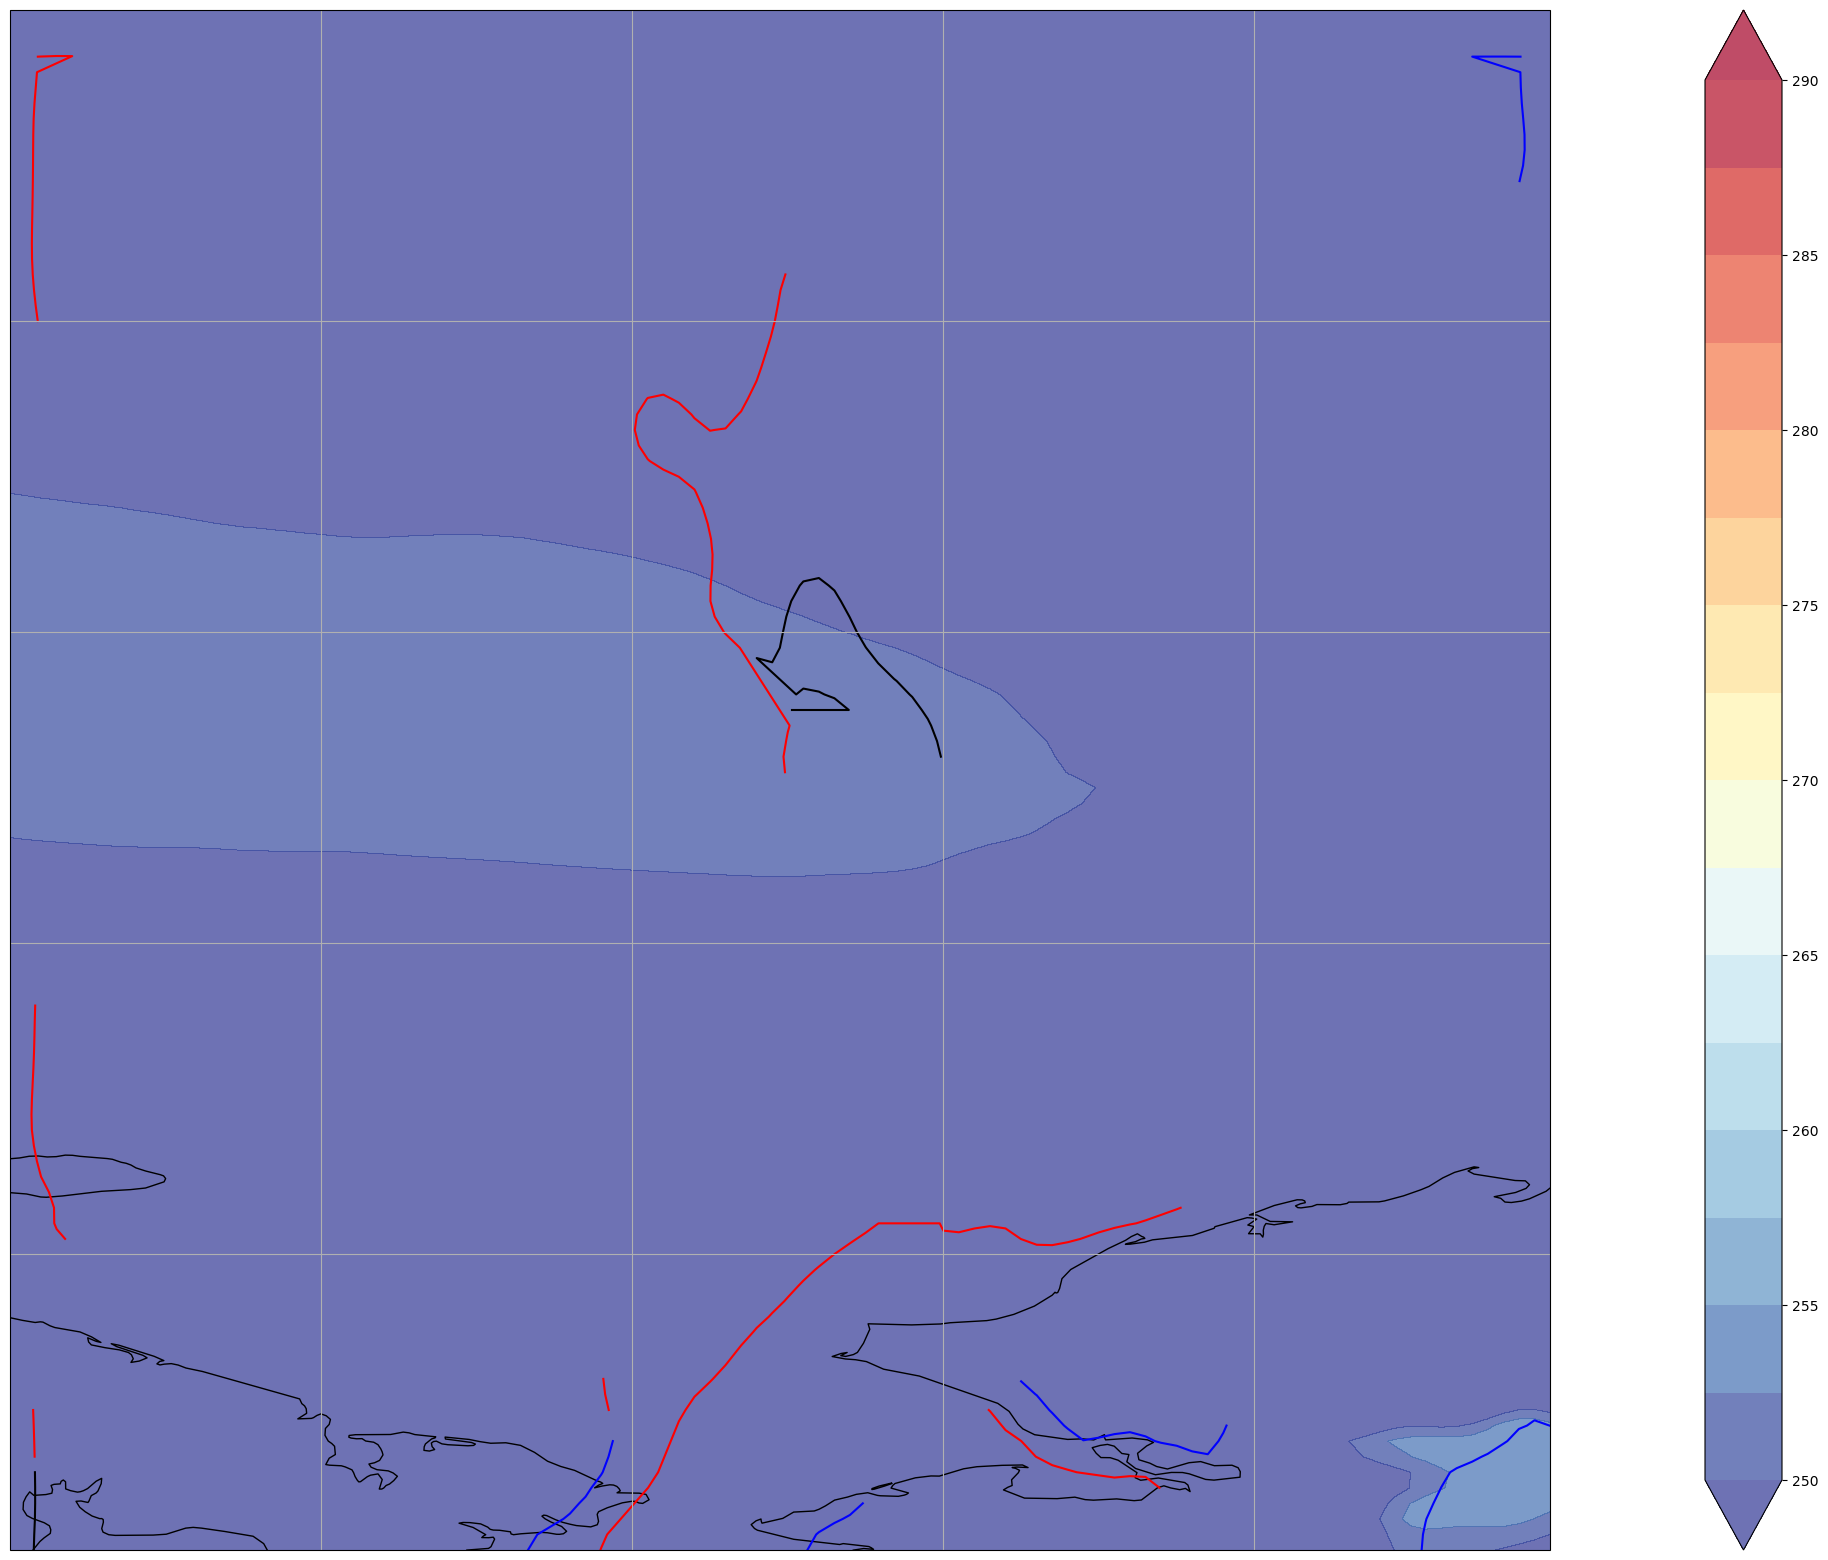

In [4]:
fr = test_front_detection_metpy(line=0)

lines = fr[0]
t_wet = fr[1]

clines=lines['cold_fronts']
wlines=lines['warm_fronts']
slines=lines['stationary_fronts']
wpts=lines['wpts']
spts=lines['spts']
cpts=lines['cpts']

fig=plt.figure(figsize=(40,20))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
# ax.set_extent([110,180,-10,-60])
ax.coastlines()
ax.gridlines()
f=ax.contourf(t_wet.longitude,t_wet.latitude,t_wet,np.arange(250,291,2.5),extend='both',transform=ccrs.PlateCarree(),cmap='RdYlBu_r', alpha=0.7)
for n in range(len(slines)):
    ax.plot(slines[n][1],slines[n][0],'k',ms=1,transform=ccrs.PlateCarree())
for n in range(len(wlines)):
    ax.plot(wlines[n][1],wlines[n][0],'r',ms=1,transform=ccrs.PlateCarree())
for n in range(len(clines)):
    ax.plot(clines[n][1],clines[n][0],'b',ms=1,transform=ccrs.PlateCarree())
#for n in range(len(wpts)):
    #ax.scatter(wpts[n][1],wpts[n][0],color='pink',s=10,transform=ccrs.PlateCarree(), alpha=1.0)
#for n in range(len(spts)):
    #ax.scatter(spts[n][1],spts[n][0],color='w',s=10,transform=ccrs.PlateCarree(), alpha=1.0)
#for n in range(len(cpts)):
    #ax.scatter(cpts[n][1],cpts[n][0],color='cyan',s=10,transform=ccrs.PlateCarree(), alpha=1.0)
cbar=fig.colorbar(f)
#fig.savefig('frontdetection/front_metpy.pdf')
#plt.show()

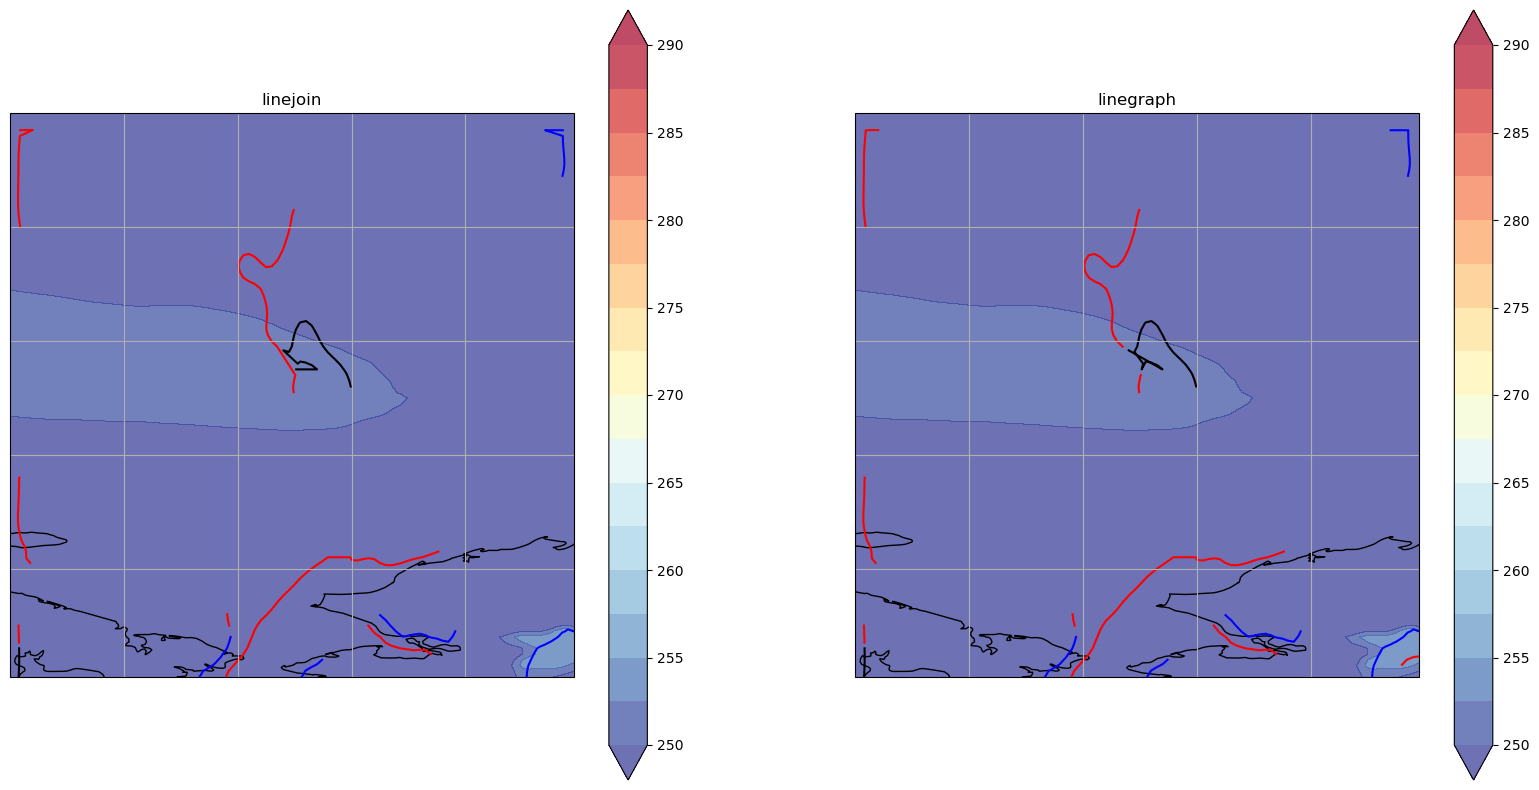

In [5]:
fr = test_front_detection_metpy(line=0)
fr_0 = test_front_detection_metpy(line=1)

lines = fr[0]
t_wet = fr[1]
lines_0 = fr_0[0]
t_wet_0 = fr_0[1]

clines=lines['cold_fronts']
wlines=lines['warm_fronts']
slines=lines['stationary_fronts']
clines_0=lines_0['cold_fronts']
wlines_0=lines_0['warm_fronts']
slines_0=lines_0['stationary_fronts']

# Create the figure and plot the data:
fig=plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
plt.title('linejoin')
#ax.set_extent([110,180,-10,-60])
f=ax.contourf(t_wet.longitude,t_wet.latitude,t_wet,np.arange(250,291,2.5),extend='both',transform=ccrs.PlateCarree(),cmap='RdYlBu_r', alpha=0.7)
for n in range(len(slines)):
    ax.plot(slines[n][1],slines[n][0],'k',ms=1,transform=ccrs.PlateCarree())
for n in range(len(wlines)):
    ax.plot(wlines[n][1],wlines[n][0],'r',ms=1,transform=ccrs.PlateCarree())
for n in range(len(clines)):
    ax.plot(clines[n][1],clines[n][0],'b',ms=1,transform=ccrs.PlateCarree())
cbar=fig.colorbar(f)

ax1 = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree())
ax1.coastlines()
ax1.gridlines()
plt.title('linegraph')
#ax.set_extent([110,180,-10,-60])
f=ax1.contourf(t_wet_0.longitude,t_wet_0.latitude,t_wet_0,np.arange(250,291,2.5),extend='both',transform=ccrs.PlateCarree(),cmap='RdYlBu_r', alpha=0.7)
for n in range(len(slines_0)):
    ax1.plot(slines_0[n][1],slines_0[n][0],'k',ms=1,transform=ccrs.PlateCarree())
for n in range(len(wlines_0)):
    ax1.plot(wlines_0[n][1],wlines_0[n][0],'r',ms=1,transform=ccrs.PlateCarree())
for n in range(len(clines_0)):
    ax1.plot(clines_0[n][1],clines_0[n][0],'b',ms=1,transform=ccrs.PlateCarree())
cbar=fig.colorbar(f)